# Exclusivo Para Descargar las imagenes y cvs

In [0]:
# Establece enlace con Nuestro proyecto en Google Cloud y toma control del proyecto 
from google.colab import auth
auth.authenticate_user()
# https://cloud.google.com/resource-manager/docs/creating-managing-projects
project_id = 'xxxxxx'
!gcloud config set project {project_id}

Updated property [core/project].


In [1]:
# Creando carpeta de datos
#!mkdir center
# Obtener mi dirección actual
!pwd
# Cambiar privasidad
!sudo chown -R $USER:$USER IMG

/home/dcastilloa


In [3]:
# Con esto se 
# NOTA: el actual directorio se llama /content
# Download the file from a given Google Cloud Storage bucket.
#!gsutil cp -r gs://data_self_driving/center /content
!gsutil cp gs://data_self_driving/IMG.zip /home/dcastilloa
#!gsutil cp gs://data_self_driving/IMG.zip /content
# Imprime los datos en la carpeta actual
#!ls

Copying gs://data_self_driving/IMG.zip...
- [1 files][239.4 MiB/239.4 MiB]                                                
Operation completed over 1 objects/239.4 MiB.                                    


In [ ]:
!gsutil cp -r gs://data_self_driving/content/data /content
!gsutil cp -r gs://data_self_driving/content/tf /content
!gsutil cp -r gs://data_self_driving/content/backup /content

In [0]:
# Donwload data from our bucket in GCP
!gsutil cp gs://data_self_driving/data/interpolated.csv /content

Copying gs://data_self_driving/data/interpolated.csv...
/ [1 files][ 18.0 MiB/ 18.0 MiB]                                                
Operation completed over 1 objects/18.0 MiB.                                     


In [ ]:
# Unzip out data into the VM
!unzip IMG.zip

In [1]:
import pandas as pd 
from sklearn import preprocessing
import numpy as np
import cv2
import skimage.io
import matplotlib.pyplot as plt
import PIL.Image
import time
import os
from skimage.transform import rescale, resize, downscale_local_mean

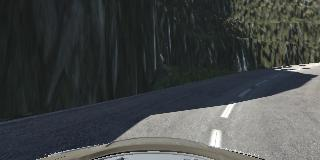

In [5]:
# Visualizando datos
im_test = skimage.io.imread('IMG/center_2018_11_20_18_35_50_667.jpg')
#im_test = cv2.imread(X_train_path[0][500], cv2.COLOR_BGR2RGB)
PIL.Image.fromarray(im_test)

In [3]:
!ls

Download_from_bucket.ipynb	   content
IMG				   data
IMG.zip				   data_preprocesing_test.ipynb
Keras_converter.ipynb		   data_preprocesing_train.ipynb
Training_model_self_driving.ipynb  driving_log.csv
Untitled.ipynb			   gym
Untitled1.ipynb			   js
Untitled2.ipynb			   models
backup				   tb
colabtools


# Exclusivo para guardar en el Bucket

In [0]:
from google.colab import auth
auth.authenticate_user()

# https://cloud.google.com/resource-manager/docs/creating-managing-projects
project_id = 'xxxxxx'
!gcloud config set project {project_id}

In [0]:
import uuid

# Make a unique bucket to which we'll upload the file.
# (GCS buckets are part of a single global namespace.)
bucket_name = 'colab-content-bucket-' + str(uuid.uuid1())

# Full reference: https://cloud.google.com/storage/docs/gsutil/commands/mb
!gsutil mb gs://{bucket_name}

bucket_name = 'data_self_driving'
# Copy the file to our new bucket.
# Full reference: https://cloud.google.com/storage/docs/gsutil/commands/cp
!gsutil cp -r backup gs://{bucket_name}/content
!gsutil cp -r tb gs://{bucket_name}/content
!gsutil cp -r data gs://{bucket_name}/content
  
# Finally, dump the contents of our newly copied file to make sure everything worked.
#!gsutil cat gs://{bucket_name}/to_upload.txt

In [0]:
!gsutil cp -r center gs://{bucket_name}/content

In [0]:
bucket_name = 'data_self_driving'
!gsutil cp -r backup gs://{bucket_name}/content

In [ ]:
bucket_name = 'data_self_driving'
!gsutil cp -r data gs://{bucket_name}/content/

In [5]:
!nvidia-smi

Wed Nov 21 08:05:24 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 396.44                 Driver Version: 396.44                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    46W / 300W |  15670MiB / 16160MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  